# Régression logistique avec descente de gradient et calcul parallèle

In [120]:
library(readxl)
library(ggplot2)
library(devtools)
library(formula.tools)
library(caret)

In [121]:
# test avec data_breast_cancer
data <- read_excel("breast.xlsx")
data

clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
10,6,6,2,4,10,9,7,1,malignant
4,2,2,1,2,1,2,1,1,begnin
1,1,1,1,2,1,2,1,1,begnin
2,1,1,1,2,1,2,1,1,begnin
4,1,1,1,2,1,2,1,1,begnin
1,1,1,1,2,1,1,1,1,begnin
1,1,1,1,2,1,2,1,1,begnin
5,1,1,1,2,1,2,1,1,begnin
3,1,1,1,2,1,2,1,1,begnin


In [122]:
dmy <- dummyVars(school~., data = read.csv('student-mat.csv', sep = ';'))
x <- predict(dmy,newdata = read.csv('student-mat.csv', sep = ';'))
x <- cbind('(Intercept)'= 1, x)
x

,(Intercept),sexF,sexM,age,addressR,addressU,famsizeGT3,famsizeLE3,PstatusA,PstatusT,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,1,1,0,18,0,1,1,0,1,0,...,4,3,4,1,1,3,6,5,6,6
2,1,1,0,17,0,1,1,0,0,1,...,5,3,3,1,1,3,4,5,5,6
3,1,1,0,15,0,1,0,1,0,1,...,4,3,2,2,3,3,10,7,8,10
4,1,1,0,15,0,1,1,0,0,1,...,3,2,2,1,1,5,2,15,14,15
5,1,1,0,16,0,1,1,0,0,1,...,4,3,2,1,2,5,4,6,10,10
6,1,0,1,16,0,1,0,1,0,1,...,5,4,2,1,2,5,10,15,15,15
7,1,0,1,16,0,1,0,1,0,1,...,4,4,4,1,1,3,0,12,12,11
8,1,1,0,17,0,1,1,0,1,0,...,4,1,4,1,1,1,6,6,5,6
9,1,0,1,15,0,1,0,1,1,0,...,4,2,2,1,1,1,0,16,18,19
10,1,0,1,15,0,1,1,0,0,1,...,5,5,1,1,1,5,0,14,15,15


In [123]:
as.matrix(x[, 2:5])

,sexF,sexM,age,addressR
1,1,0,18,0
2,1,0,17,0
3,1,0,15,0
4,1,0,15,0
5,1,0,16,0
6,0,1,16,0
7,0,1,16,0
8,1,0,17,0
9,0,1,15,0
10,0,1,15,0


In [124]:
# Conversion de la variable en 0/1 à intégrer dans une fonction ?

data$classe <- as.factor(data$classe)
levels(data$classe) <- c(0, 1)
data$classe <- as.numeric(levels(data$classe))[data$classe]
data
# y <- matrix(ifelse(data_frame[, 1] == "malignant", 1, 0))

clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,6,6,2,4,10,9,7,1,1
4,2,2,1,2,1,2,1,1,0
1,1,1,1,2,1,2,1,1,0
2,1,1,1,2,1,2,1,1,0
4,1,1,1,2,1,2,1,1,0
1,1,1,1,2,1,1,1,1,0
1,1,1,1,2,1,2,1,1,0
5,1,1,1,2,1,2,1,1,0
3,1,1,1,2,1,2,1,1,0


In [125]:
set.seed(10)
train_index <- createDataPartition(data$classe, p = 0.7, list = F)

In [126]:
train_set <- data[train_index, ]
test_set <- data[-train_index, ]

In [127]:
table(train_set$classe)


  0   1 
318 172 

In [128]:
get_x_y <- function(formula, data) {

    vars <- get.vars(formula, data)
    y_name = vars[1]
    x_names <- vars[-1]


    y <- as.matrix(data[, y_name])

    dmy <- dummyVars(formula, data)
    x <- predict(dmy, data)
    x <- cbind("(Intercept)" = 1, x)

    return(list(target = y, features = x, y_name = y_name, x_names = x_names))
}

In [129]:
get_x_y(classe~., data = data)

classe
1
0
0
0
0
0
0
0
0
0


## Fonction sigmoide

$ \Large h(x) =  \frac{1}{1 + e^{-x} }  $  

![equation](https://latex.codecogs.com/png.latex?%5Clarge%20h%28x%29%20%3D%20%5Cfrac%7B1%7D%7B1%20&plus;%20e%5E%7B-x%7D%20%7D)

In [130]:
sigmoid <- function(x) {
    return(1 / (1 + exp(-x)))
}

## Modèle

$ \Large F(X) = X.\theta  $  
![equation](https://latex.codecogs.com/png.latex?%5Clarge%20F%28X%29%20%3D%20X.%5Ctheta)

In [131]:
x_dot_theta <- function(x, theta) {
    return(x %*% theta)
}

## Fonction de la régression logistique

$ \Large h_ \theta (x) =  \frac{1}{1 + e^{- X.\theta} }  $  
![equation](https://latex.codecogs.com/png.latex?%5Clarge%20h_%20%5Ctheta%20%28x%29%20%3D%20%5Cfrac%7B1%7D%7B1%20&plus;%20e%5E%7B-%20X.%5Ctheta%7D%20%7D)

In [132]:
probability <- function(x, theta) {
    return(sigmoid(x_dot_theta(x, theta))) # nolint
}

## Fonction de cout

$ \Large J(\theta) = -\frac{1}{m} \sum y \times log(\sigma(X.\theta)) + (1-y) \times (1-\sigma(X.\theta)) $  
![equation](https://latex.codecogs.com/png.latex?%5Clarge%20J%28%5Ctheta%29%20%3D%20-%5Cfrac%7B1%7D%7Bm%7D%20%5Csum%20y%20%5Ctimes%20log%28%5Csigma%28X.%5Ctheta%29%29%20&plus;%20%281-y%29%20%5Ctimes%20%281-%5Csigma%28X.%5Ctheta%29%29)

In [133]:
cost_function <- function(x, y, theta) {
    m <- nrow(y)
    g <- probability(x, theta) # nolint
    j <- (1 / m) * sum((-y * log(g)) - ((1 - y) * log(1 - g)))
    return(j)
}

## Calcul du gradient

$\Large \frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(\sigma(X.\theta)-y)$  
![equation](https://latex.codecogs.com/gif.latex?%5Cfrac%7B%5Cpartial%20J%28%5Ctheta%29%20%7D%7B%5Cpartial%20%5Ctheta%7D%20%3D%20%5Cfrac%7B1%7D%7Bm%7D%20X%5ET.%28%5Csigma%28X.%5Ctheta%29-y%29)



In [134]:
# Gradient : calcul des dérivées partielles de chacun des paramètres de theta
gradient <- function(x, y, theta) {
    m <- nrow(y)
    return((1 / m) * x_dot_theta(t(x), probability(x, theta) - y)) # nolint
}

## Descente de gradient

$\Large \theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$  
![equation](https://latex.codecogs.com/png.latex?%5Clarge%20%5Ctheta%20%3D%20%5Ctheta%20-%20%5Calpha%20%5Cfrac%7B%5Cpartial%20J%28%5Ctheta%29%20%7D%7B%5Cpartial%20%5Ctheta%7D)




In [135]:
batch_gradient_descent <- function(x, y, theta, learning_rate, max_iter, tol) { # nolint

    cost_history <- c()#c(cost_function(x, y, theta)) # nolint
    m <- nrow(y)
    iter <- 0
    converge <- FALSE

    while ((iter < max_iter) && (converge == FALSE)) {
        iter <- iter + 1
        random_index <- sample(x = m, size = m)
        new_theta <- theta - learning_rate * gradient(x[random_index, ], as.matrix(y[random_index, ]), theta) # nolint
        cost_history <- c(cost_history, cost_function(x[random_index, ], as.matrix(y[random_index, ]), new_theta)) # nolint


        if (sum(abs(new_theta - theta)) < tol) {
            converge <- TRUE
        }

        theta <- new_theta
    }
    return(list(theta = theta, cost_history = cost_history))
}

In [136]:
stochastic_gradient_descent <- function(x, y, theta, learning_rate, max_iter, tol) { # nolint

    cost_history <- c() #c(cost_function(x, y, theta)) # nolint
    m <- nrow(y)
    iter <- 0
    converge <- FALSE
    theta_list <- c()

    while ((iter < max_iter) && (converge == FALSE)) {
        iter <- iter + 1
        random_index <- sample(x = m, size = m)

        for (j in 1:m) {
            # Update theta
            y_i <- as.matrix(y[random_index[j], ])
            x_i <- t(as.matrix(x[random_index[j], ]))
            theta <- theta - learning_rate * gradient(x_i, y_i, theta) # nolint
        }
        cost_history <- c(cost_history, cost_function(x_i, y_i, theta)) # nolint

        theta_list <- append(theta_list, theta)

        if (sum(abs(theta_list[length(theta_list)] - theta_list[length(theta_list)-1])) < tol) { # nolint
            converge <- TRUE
        }
    }
    return(list(theta = theta, cost_history = cost_history))
}

In [137]:
mini_batch_gradient_descent <- function(x, y, theta, learning_rate, max_iter, batch_size, tol) { # nolint

    cost_history <- c() #c(cost_function(x, y, theta)) # nolint
    m <- nrow(y)
    iter <- 0
    converge <- FALSE
    theta_list <- c()

    while ((iter < max_iter) && (converge == FALSE)) {
        # Shuffle data
        iter <- iter + 1
        random_index <- sample(x = m, size = m)
        x <- as.matrix(x[random_index, ])
        y <- as.matrix(y[random_index, ])
        x_i <- c()
        y_i <- c()

        index <- seq(1, m, batch_size - 1)

        for (j in 1:trunc(m / batch_size)) {
            y_i <- as.matrix(y[index[[j]]:index[[j + 1]], ])
            x_i <- as.matrix(x[index[[j]]:index[[j + 1]], ])
            theta <- theta - learning_rate * gradient(x_i, y_i, theta) # nolint
        }
        cost_history <- c(cost_history, cost_function(x_i, y_i, theta)) # nolint

        theta_list <- append(theta_list, theta)

        if (sum(abs(theta_list[length(theta_list)] - theta_list[length(theta_list)-1])) < tol) { # nolint
            converge <- TRUE
        }

    }
    return(list(theta = theta, cost_history = cost_history))
}

In [161]:
# Gradient descent
rlgd.fit <- function(formula, data, mode, batch_size, learning_rate = 0.5, max_iter = 100, tol = 1e-4) { # nolint
    x_y <- get_x_y(formula, data) # nolint

    x <- x_y$features
    y <- x_y$target
    y_name <- x_y$y_name
    x_names <- x_y$x_names


    initial_theta <- as.matrix(rnorm(n = dim(x)[2], mean = 0, sd = 1))


    if (mode == "batch" || (mode == "mini-batch" && batch_size >= nrow(y))) {
        gradient_descent <- batch_gradient_descent(x, y, initial_theta, learning_rate, max_iter, tol) # nolint
    } else if (mode == "online" || (mode == "mini-batch" && batch_size == 1)) { # nolint
        gradient_descent <- stochastic_gradient_descent(x, y, initial_theta, learning_rate, max_iter, tol) # nolint
    } else if (mode == "mini-batch") {
        gradient_descent <- mini_batch_gradient_descent(x, y, initial_theta, learning_rate, max_iter, batch_size, tol) # nolint
    } else {
        return("erreur")
    }

    # Création de l'instance
    inst <- list(formula = formula, x = x, y = y, y_name = y_name, x_names = x_names, mode = mode, batch_size = batch_size, learning_rate = learning_rate, max_iter = max_iter, # nolint
        initial_theta = initial_theta, theta = gradient_descent[[1]], cost_history = gradient_descent[[2]] # nolint
    ) # nolint

    attr(inst, "class") <- "Reg.Log"
    return(inst)
}

In [170]:
# Surchage de la fonction print pour l'objet retourné par fit
print.Reg.Log <- function(obj) { # nolint
    cat("Formula:", as.character(obj$formula), "\n")
    cat("Target:", obj$y_name, "\n")
    cat("Features:", obj$x_names, "\n")
    cat("Mode:", obj$mode, "\n")
    cat("Learning rate:", obj$learning_rate, "\n")
    cat("Max_iter:", obj$max_iter, "\n")
    cat("Batch size:", obj$batch_size, "\n")
    cat("Coefficient:", "\n")
    print(rownames(obj$theta))
    print(obj$theta)
    cat("Cost history:", obj$cost_history)
}

In [182]:
# Surcharge de la fonction summary pour l'objet retourné par fit
summary.Reg.Log <- function(obj) { # nolint
    cat("Model:", as.character(obj$formula), "\n")
    cat("Mode:", obj$mode, "\n")
    cat("Learning rate:", obj$learning_rate, "\n")
    cat("n_iter:", obj$n_iter, "\n")
    cat("Batch size:", obj$batch_size, "\n")
    cat("Coefficient:", "\n")
    cat(rownames(obj$theta), "\n")
    cat(t(obj$theta), "\n")
    cat("Cost history:", obj$cost_history)
}

In [184]:
cmat <- cbind(rnorm(3, 10), sqrt(rchisq(3, 12)))
cmat <- cbind(cmat, cmat[, 1]/cmat[, 2])
cmat <- cbind(cmat, 2*pnorm(-cmat[, 3]))
colnames(cmat) <- c("Estimate", "Std.Err", "Z value", "Pr(>z)")
printCoefmat(cmat[, 1:3])
printCoefmat(cmat)
op <- options(show.coef.Pvalues = FALSE)
printCoefmat(cmat, digits = 2)
printCoefmat(cmat, digits = 2, P.values = TRUE)
options(op) # restore

     Estimate Std.Err Z value
[1,]   8.8417  3.5976  2.4577
[2,]  10.4606  3.5352  2.9589
[3,]   9.2785  4.9532  1.8732
     Estimate Std.Err Z value   Pr(>z)   
[1,]   8.8417  3.5976  2.4577 0.013984 * 
[2,]  10.4606  3.5352  2.9589 0.003087 **
[3,]   9.2785  4.9532  1.8732 0.061039 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
     Estimate Std.Err Z value
[1,]      8.8     3.6     2.5
[2,]     10.5     3.5     3.0
[3,]      9.3     5.0     1.9
     Estimate Std.Err Z value Pr(>z)   
[1,]      8.8     3.6     2.5  0.014 * 
[2,]     10.5     3.5     3.0  0.003 **
[3,]      9.3     5.0     1.9  0.061 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [183]:
# Print de l'objet de la classe fit
obj.Reg.Log <- rlgd.fit(classe ~ ., data, mode = "batch", batch_size = 32, learning_rate = 0.1, max_iter= 4) # nolint
summary(obj.Reg.Log)

Model: classe ~ . 
Mode: batch 
Learning rate: 0.1 
n_iter: 
Batch size: 32 
Coefficient: 
(Intercept) clump ucellsize ucellshape mgadhesion sepics bnuclei bchromatin normnucl mitoses 
0.2702854 0.2783364 -0.02355016 -0.6557152 1.03089 -0.9626312 -1.536705 1.462217 0.4904019 1.013002 
Cost history: 4.054514 2.952161 2.69186 2.539496

In [187]:
# Comparaison de print de glm
obj <- glm(classe ~ ., data = data, family = "binomial")
print(obj)


Call:  glm(formula = classe ~ ., family = "binomial", data = data)

Coefficients:
(Intercept)        clump    ucellsize   ucellshape   mgadhesion       sepics  
  -9.670977     0.531186     0.005841     0.332579     0.240317     0.069365  
    bnuclei   bchromatin     normnucl      mitoses  
   0.400130     0.410683     0.144749     0.550705  

Degrees of Freedom: 698 Total (i.e. Null);  689 Residual
Null Deviance:	    900.5 
Residual Deviance: 117 	AIC: 137


In [144]:
# Comparaison de summary de glm
obj <- glm(classe ~ clump + ucellsize, data = data, family = "binomial")
summary(obj)


Call:
glm(formula = classe ~ clump + ucellsize, family = "binomial", 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7760  -0.2431  -0.0969   0.0303   2.6596  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.15170    0.60084 -11.903  < 2e-16 ***
clump        0.61739    0.09229   6.690 2.24e-11 ***
ucellsize    1.17507    0.12309   9.547  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 900.53  on 698  degrees of freedom
Residual deviance: 212.31  on 696  degrees of freedom
AIC: 218.31

Number of Fisher Scoring iterations: 7


In [145]:
rlgd.predict <- function(Reg.log, newdata, type) { # nolint

    # New data control

    if (identical(Reg.log$x_names, colnames(newdata))) {
         x <- as.matrix(data.frame(rep(1, nrow(newdata)), newdata))

        # Probability of belonging
        probs = probability(x, Reg.log$theta) # nolint

        if (type == "class") {
            return(unlist(ifelse(probs > 0.5, 1, 0)))
        }else if (type == "posterior") {
            return(probs)
        }
    }else{
        return("Erreur")
    }
}


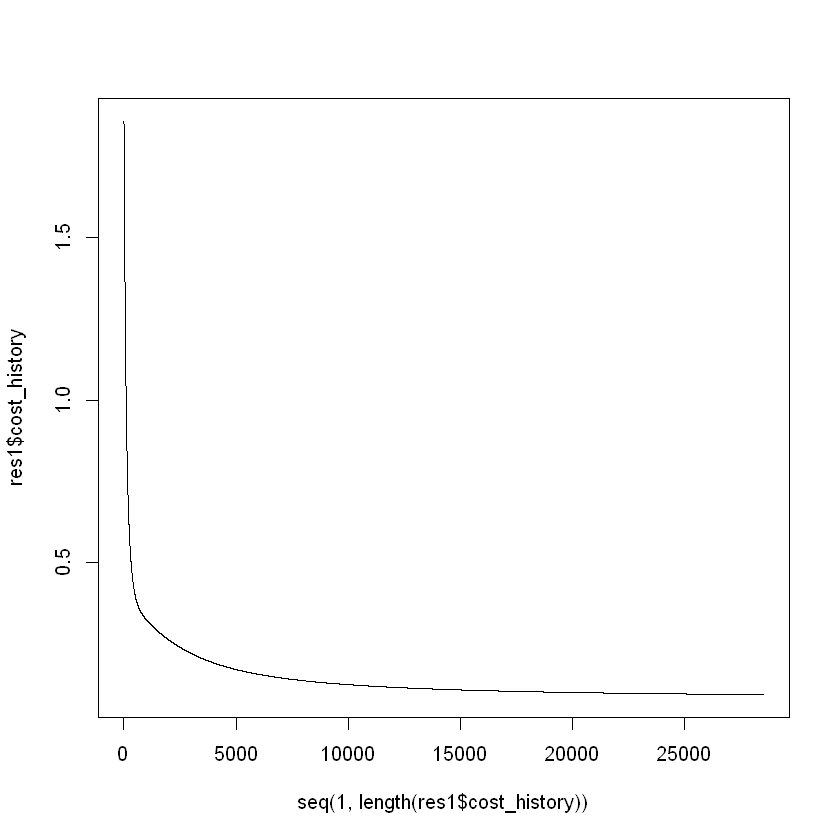

In [146]:
res1 <- rlgd.fit(classe ~ ., train_set, mode = "batch", batch_size = 32, learning_rate = 0.01, max_iter = 40000, tol = 1e-4) # nolint
plot(seq(1, length(res1$cost_history)), res1$cost_history, type = "l")

In [147]:
res1$x_names

[1] "clump"      "ucellsize"  "ucellshape" "mgadhesion" "sepics"    
[6] "bnuclei"    "bchromatin" "normnucl"   "mitoses"

In [148]:
y_pred <- rlgd.predict(res1, test_set[, res1$x_names], type = "class")
accuracy <- mean(y_pred == test_set[, res1$y_name])
print(accuracy)

[1] 0.9665072


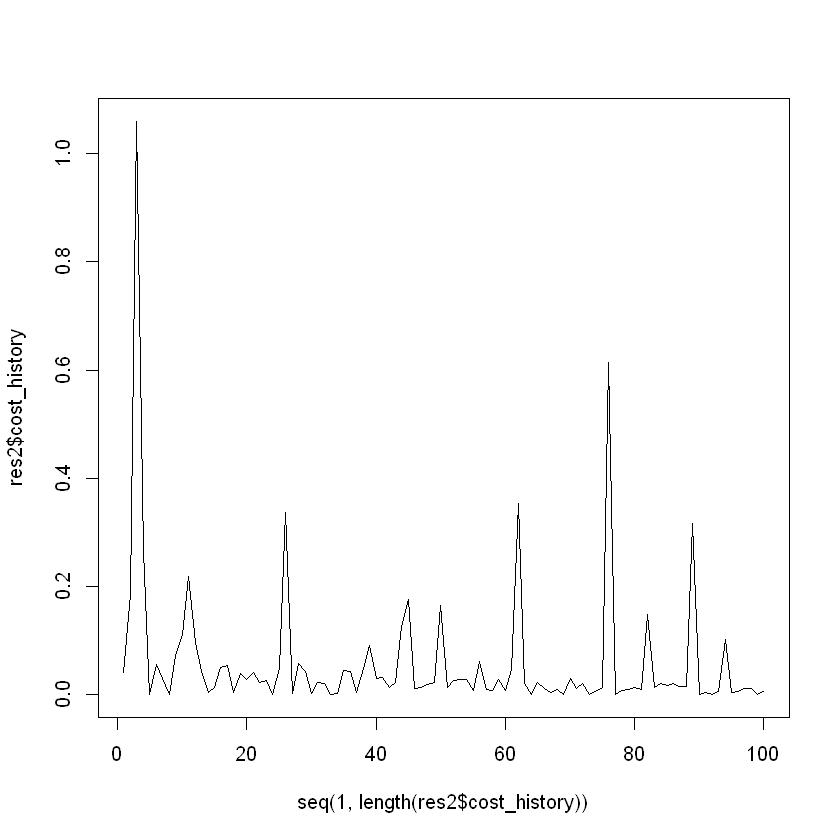

In [153]:
res2 <- rlgd.fit(classe ~ ., train_set, mode = "online", batch_size = 32, learning_rate = 0.01, max_iter = 100, tol = 1e-4) # nolint
plot(seq(1, length(res2$cost_history)), res2$cost_history, type = "l")

In [154]:
y_pred <- rlgd.predict(res2, test_set[, res2$x_names], type = "class")
accuracy <- mean(y_pred == test_set[, res2$y_name])
print(accuracy)

[1] 0.9712919


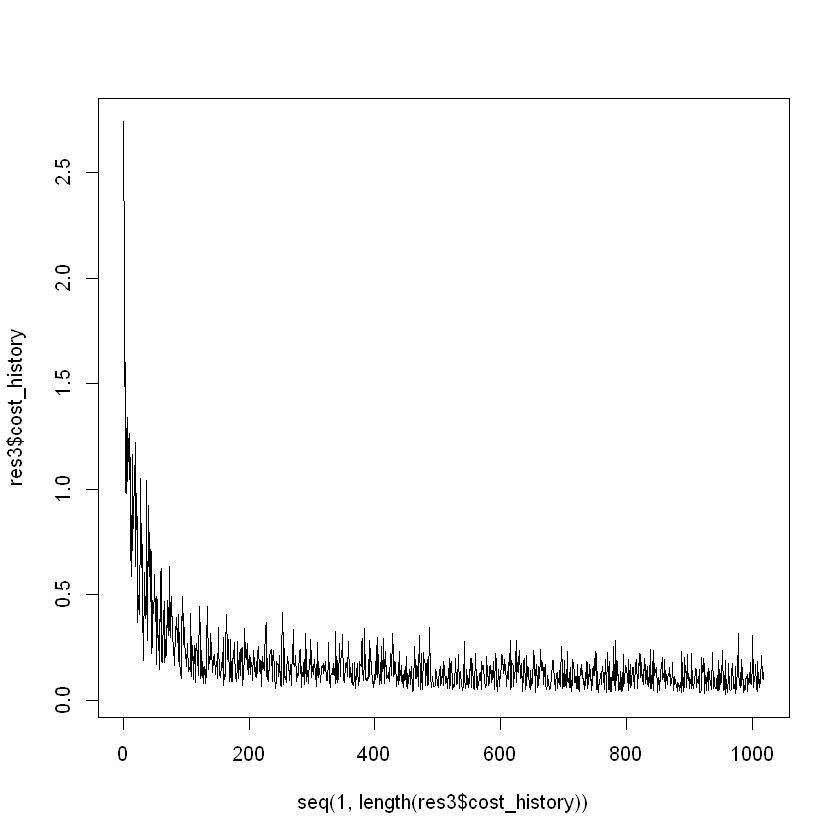

In [151]:
res3 <- rlgd.fit(classe ~ ., train_set, mode = "mini-batch", batch_size = 32, learning_rate = 0.01, max_iter = 2000, tol = 1e-4) # nolint
plot(seq(1, length(res3$cost_history)), res3$cost_history, type = "l")

In [152]:
y_pred <- rlgd.predict(res3, test_set[, res3$x_names], type = "class")
accuracy <- mean(y_pred == test_set[, res3$y_name])
print(accuracy)

[1] 0.9617225
